Создатель - Павлий Иван

> 

Тема - Будет ли отменена бронь в отеле

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("hotel_bookings.csv")

df.shape

df.dtypes ##Есть целые числа, дробные числа и переменные класса "object"

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [ ]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.isna().sum() ##Пропусков почти нет, небольшое количество в одном столбце (country) - их скорее всего можно удалить
## Довольно большое количество пропусков в двух столбцах - (agent, company) - скорее всего прийдется чем то заменять

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<ipython-input-14-f02c9dab7bca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()
<ipython-input-14-f02c9dab7bca>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)


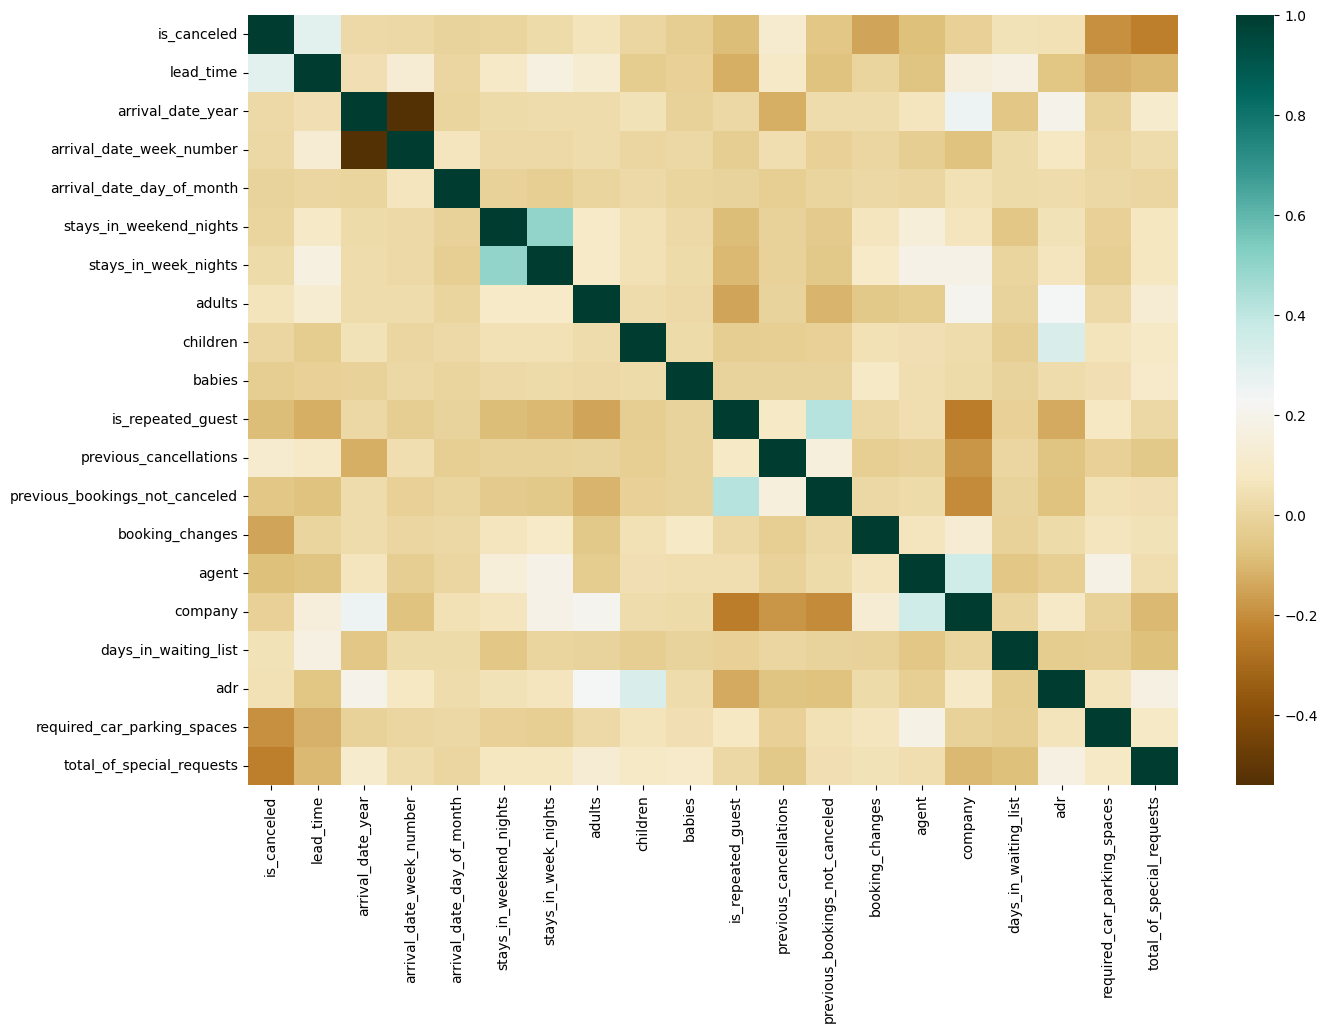

In [ ]:
df_corr = df.corr()

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, mask=np.zeros_like(df_corr, dtype = np.bool), cmap = 'BrBG', ax=ax)
plt.show()

## Из кореляционной матрицы мы видим, что связть между многими объектами минимальна

<Axes: >

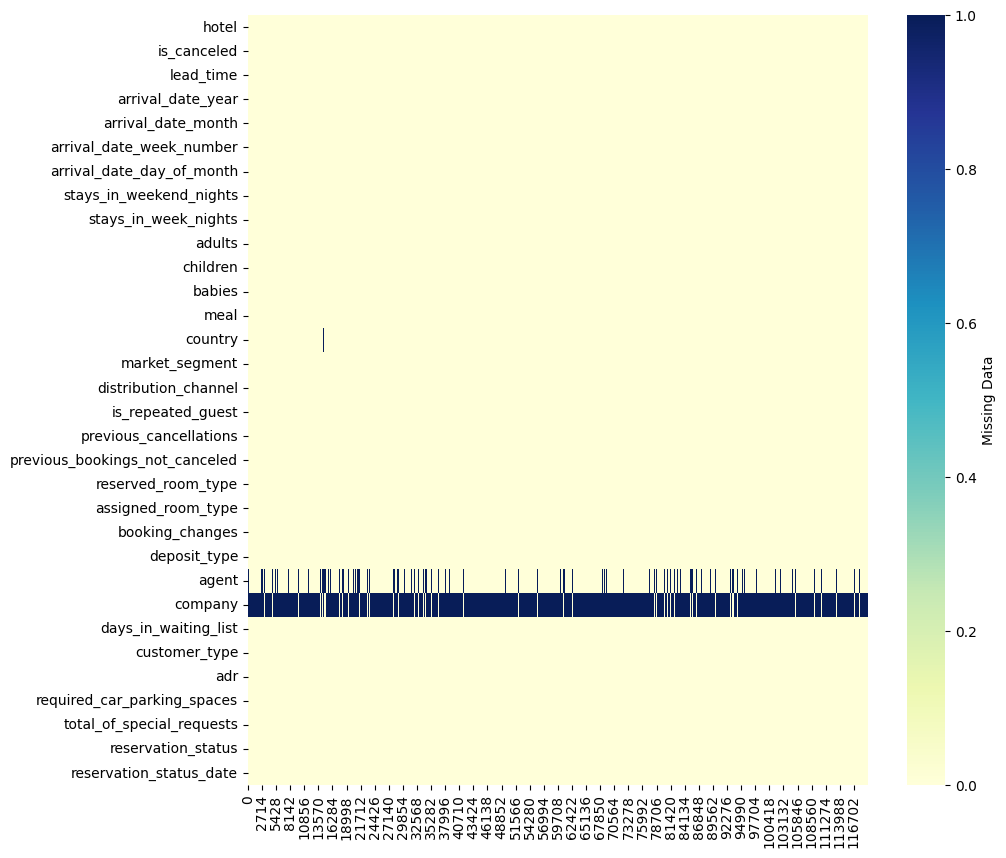

In [ ]:
#визуализируем наличие пропусков
plt.figure(figsize=(10,10))
sns.heatmap(df.isna().transpose(), cmap = "YlGnBu", cbar_kws={'label':'Missing Data'})

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

hotel - 0%
is_canceled - 0%
lead_time - 0%
arrival_date_year - 0%
arrival_date_month - 0%
arrival_date_week_number - 0%
arrival_date_day_of_month - 0%
stays_in_weekend_nights - 0%
stays_in_week_nights - 0%
adults - 0%
children - 0%
babies - 0%
meal - 0%
country - 0%
market_segment - 0%
distribution_channel - 0%
is_repeated_guest - 0%
previous_cancellations - 0%
previous_bookings_not_canceled - 0%
reserved_room_type - 0%
assigned_room_type - 0%
booking_changes - 0%
deposit_type - 0%
agent - 14%
company - 94%
days_in_waiting_list - 0%
customer_type - 0%
adr - 0%
required_car_parking_spaces - 0%
total_of_special_requests - 0%
reservation_status - 0%
reservation_status_date - 0%


In [ ]:
df = df.drop(columns = ['company']) ## у company почти 100% данных пропущено, так что мы её удаляем

In [ ]:
df = df.fillna(df.median()) 
##В нектороых других столбцах есть пропуски, но их настолько мало, что мы просто заменим их на медианное значение

<ipython-input-18-f3eef8571c92>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.median())


In [ ]:
##df = df.fillna(df.mean())

In [ ]:
category = df.loc[:, df.dtypes == object].columns
category

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=category) ## кодируем категориальные данные

In [ ]:
df = df.interpolate()

Что нужно сделать: понижение признакого пространства (понижение размерности RSA) - искать в задаче oil/gas,


Попробовать объяснить почему получился максимальный score

In [ ]:
#проверим балансировку данных
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
##from sklearn.decomposition import PCA

##pca = PCA(n_components=15)

##principalComponents = pca.fit_transform(df)
##df = pd.DataFrame(data = principalComponents)

In [ ]:
#разделим данные на features и target
X = df.drop(columns=['is_canceled'])
y = df['is_canceled']

y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [ ]:
#данные не сбалансированны, это необходимо исправить. Используем алгоритм SMOTE и произведем oversampling

from imblearn.over_sampling import SMOTE

os = SMOTE(random_state = 123, k_neighbors = 10)

column = X.columns

X_os, y_os = os.fit_resample(X, y)
X_os = pd.DataFrame(data = X_os, columns = column)
y_os = pd.DataFrame(data = y_os, columns = ['is_canceled'])

print(X_os.shape, y_os.shape)
y_os.value_counts()

(150332, 1185) (150332, 1)


is_canceled
0              75166
1              75166
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_os = pd.DataFrame(StandardScaler().fit_transform(X_os), columns = X_os.columns, index = X_os.index)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Train dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (83573, 1185), (83573,)
Train dataset size: (35817, 1185), (35817,)


In [ ]:
#данные сбалансированы и обработаны
#переходим к созданию и обучению модели

## Сделать то же самое, но с Дерево решений, случайный лес, XGBOOST, CATBOOST (clasifier)



In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#посмотрим на результаты по метрикам аккуратности, полноты и точности

from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_pred, y_test))
print(recall_score(y_pred, y_test))
print(precision_score(y_pred, y_test))

1.0
1.0
1.0
